In [26]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('dark_background')

In [28]:
for style in plt.style.available:
    print(style) 

bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn-bright
seaborn-colorblind
seaborn-dark-palette
seaborn-dark
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
seaborn
Solarize_Light2
tableau-colorblind10
_classic_test


In [29]:
data_folder = '..\data\Clean UW'
#data_folder = 'Clean WF'

In [30]:
def load_sensor_csv_to_data_frame(path):
    """
    Return a Dataframe of the csv provided in the path.
    
    Notes
    -----
    This assumes the csv is properly formatted.
    This creates a Timestamp column.
    This drops NA Timestamp rows.
    This sets Timestamp to the index (use df.index to access)
    """
    # https://numpy.org/doc/stable/user/basics.types.html
    data_types = {
            'Date':str,
            'Time':str,
            'Battery':np.float64,
            'Fix':np.int32, # <- always zero?
            'Latitude':np.float64,
            'Longitude':np.float64,
            'Dp>0.3':np.int32,
            'Dp>0.5':np.int32,
            'Dp>1.0':np.int32,
            'Dp>2.5':np.int32,
            'Dp>5.0':np.int32,
            'Dp>10.0':np.int32,
            'PM1_Std':np.int32,
            'PM2.5_Std':np.int32,
            'PM10_Std':np.int32,
            'PM1_Env':np.int32,
            'PM2.5_Env':np.int32,
            'PM10_Env':np.int32,
            'Temp(C)':np.float64,
            'RH(%)':np.float64, 
            'P(hPa)':np.float64, 
            'Alti(m)':np.float64,
            }
    print("Reading {}".format(path))
    df = pd.read_csv(path, 
                     dtype=data_types)
    
    df['Timestamp'] = df['Date'] + ' ' + df['Time']
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
    
    
    na_count = df[df['Timestamp'].isnull()].shape[0]
    if na_count > 0:
        count = df.shape[0]
        print(" - Dropping {} null rows out of {} rows, {:.3}%".format(na_count, count, na_count/count/100.))
        df = df[df['Timestamp'].notnull()]
    df.set_index('Timestamp', inplace=True)
    return df

In [31]:
def load_folder(folder):
    """
    Return a list of Dataframe from csv files in the folder path.
    
    Notes
    -----
    This assumes the csv is properly formatted.
    This creates a Timestamp column.
    This drops NA Timestamp rows.
    This sets Timestamp to the index (use df.index to access)
    """
    data = []
    for _, _, files in os.walk(folder):
        for file_name in files:
            if os.path.splitext(file_name)[-1] == '.csv':
                filepath = os.path.join(folder, file_name)
                data.append(load_sensor_csv_to_data_frame(filepath))
    return data

In [32]:
data = load_folder(data_folder)

Reading ..\data\Clean UW\Beta-01.csv
 - Dropping 22 null rows out of 2506 rows, 8.78e-05%
Reading ..\data\Clean UW\Beta-03.csv
Reading ..\data\Clean UW\Beta-06.csv
 - Dropping 17 null rows out of 1395 rows, 0.000122%
Reading ..\data\Clean UW\Beta-07.csv
 - Dropping 37 null rows out of 1376 rows, 0.000269%
Reading ..\data\Clean UW\Beta-11.csv
Reading ..\data\Clean UW\Beta-12.csv
 - Dropping 1356 null rows out of 1356 rows, 0.01%
Reading ..\data\Clean UW\Beta-14.csv
 - Dropping 6 null rows out of 1449 rows, 4.14e-05%
Reading ..\data\Clean UW\Beta-16.csv
 - Dropping 144 null rows out of 1490 rows, 0.000966%
Reading ..\data\Clean UW\Beta-17.csv
 - Dropping 166 null rows out of 1361 rows, 0.00122%
Reading ..\data\Clean UW\Beta-18.csv
 - Dropping 118 null rows out of 1423 rows, 0.000829%
Reading ..\data\Clean UW\Breakout-01.csv
 - Dropping 2 null rows out of 1260 rows, 1.59e-05%
Reading ..\data\Clean UW\Breakout-02.csv
Reading ..\data\Clean UW\Breakout-06.csv
Reading ..\data\Clean UW\Breakou

In [33]:
df = load_sensor_csv_to_data_frame('..\data\Clean UW\Beta-01.csv')

Reading ..\data\Clean UW\Beta-01.csv
 - Dropping 22 null rows out of 2506 rows, 8.78e-05%


In [34]:
df.dtypes

Date          object
Time          object
Battery      float64
Fix            int32
Latitude     float64
Longitude    float64
Dp>0.3         int32
Dp>0.5         int32
Dp>1.0         int32
Dp>2.5         int32
Dp>5.0         int32
Dp>10.0        int32
PM1_Std        int32
PM2.5_Std      int32
PM10_Std       int32
PM1_Env        int32
PM2.5_Env      int32
PM10_Env       int32
Temp(C)      float64
RH(%)        float64
P(hPa)       float64
Alti(m)      float64
dtype: object

In [9]:
df.describe()

,Battery,Fix,Latitude,Longitude,Dp>0.3,Dp>0.5,Dp>1.0,Dp>2.5,Dp>5.0,Dp>10.0,PM1_Std,PM2.5_Std,PM10_Std,PM1_Env,PM2.5_Env,PM10_Env,Temp(C),RH(%),P(hPa),Alti(m)
count,2484.000000,2484.0,2484.0,2484.0,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,3.963614,0.0,0.0,0.0,415.084541,132.540660,12.436795,1.164654,0.700081,0.371176,1.840580,2.339775,2.907810,1.811594,2.268921,2.835749,24.311176,37.079622,102087.116146,-63.256709
std,0.092710,0.0,0.0,0.0,484.932171,156.422993,35.443290,4.906030,2.253700,1.451009,3.245423,5.266220,6.692904,2.926666,4.415600,5.799683,1.935938,7.151554,210.651067,17.397442
min,3.430000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.680000,22.336914,101449.390625,-128.288818
25%,3.912500,0.0,0.0,0.0,81.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.440001,32.001953,101924.289062,-72.653052
50%,3.967500,0.0,0.0,0.0,186.000000,57.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.639999,39.036133,102029.062500,-58.442087
75%,4.041250,0.0,0.0,0.0,750.000000,240.000000,16.000000,0.000000,0.000000,0.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,24.020000,43.515625,102200.685546,-49.783753
max,4.118750,0.0,0.0,0.0,8292.000000,2631.000000,691.000000,80.000000,35.000000,26.000000,60.000000,100.000000,119.000000,39.000000,66.000000,79.000000,30.370001,49.372070,102875.406250,-10.351035


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2484 entries, 2020-10-15 15:22:39 to 2020-10-16 12:46:48
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2484 non-null   object 
 1   Time       2484 non-null   object 
 2   Battery    2484 non-null   float64
 3   Fix        2484 non-null   int32  
 4   Latitude   2484 non-null   float64
 5   Longitude  2484 non-null   float64
 6   Dp>0.3     2484 non-null   int32  
 7   Dp>0.5     2484 non-null   int32  
 8   Dp>1.0     2484 non-null   int32  
 9   Dp>2.5     2484 non-null   int32  
 10  Dp>5.0     2484 non-null   int32  
 11  Dp>10.0    2484 non-null   int32  
 12  PM1_Std    2484 non-null   int32  
 13  PM2.5_Std  2484 non-null   int32  
 14  PM10_Std   2484 non-null   int32  
 15  PM1_Env    2484 non-null   int32  
 16  PM2.5_Env  2484 non-null   int32  
 17  PM10_Env   2484 non-null   int32  
 18  Temp(C)    2484 non-null   float64
 19  RH(%)      2

In [11]:
df.head()

,Date,Time,Battery,Fix,Latitude,Longitude,Dp>0.3,Dp>0.5,Dp>1.0,Dp>2.5,...,PM1_Std,PM2.5_Std,PM10_Std,PM1_Env,PM2.5_Env,PM10_Env,Temp(C),RH(%),P(hPa),Alti(m)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-10-15 15:22:39,2020/10/15,15:22:39,3.62875,0,0.0,0.0,150,50,3,0,...,0,0,0,0,0,0,30.360001,25.739258,102865.187500,-127.449402
2020-10-15 15:22:49,2020/10/15,15:22:49,3.62625,0,0.0,0.0,138,46,3,0,...,0,0,0,0,0,0,30.330000,23.285156,102866.687500,-127.572586
2020-10-15 15:22:59,2020/10/15,15:22:59,3.62500,0,0.0,0.0,159,53,0,0,...,0,0,0,0,0,0,30.309999,22.839844,102873.484375,-128.131866
2020-10-15 15:23:09,2020/10/15,15:23:9,3.62250,0,0.0,0.0,171,57,3,0,...,0,0,0,0,0,0,30.280001,22.776367,102871.750000,-127.988823
2020-10-15 15:23:19,2020/10/15,15:23:19,3.62125,0,0.0,0.0,225,75,3,0,...,0,0,0,0,0,0,30.240000,22.688477,102864.023438,-127.354027


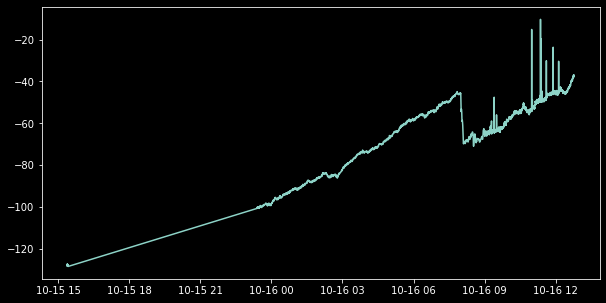

In [12]:
plt.plot(df.index, df['Alti(m)'])

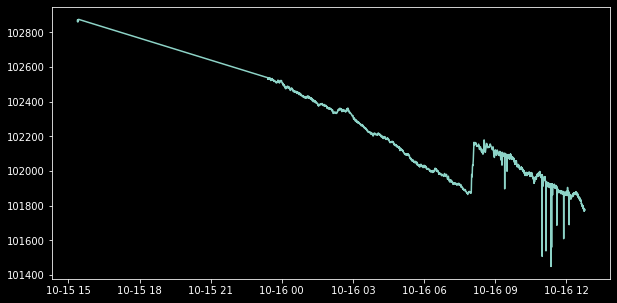

In [13]:
plt.plot(df.index, df['P(hPa)'])

In [14]:
print(df[['Alti(m)', 'P(hPa)']].corr(method='spearman'))

          Alti(m)    P(hPa)
Alti(m)  1.000000 -0.999835
P(hPa)  -0.999835  1.000000


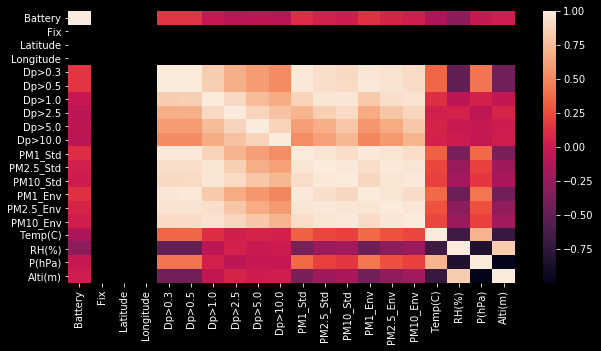

In [15]:
df_corr = df.corr()
sns.heatmap(df_corr)

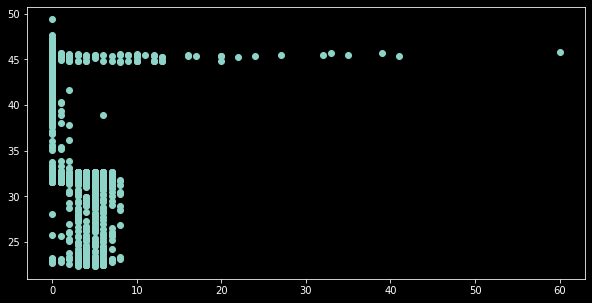

In [16]:
plt.scatter(df['PM1_Std'], df['RH(%)'])

In [17]:
df.columns

Index(['Date', 'Time', 'Battery', 'Fix', 'Latitude', 'Longitude', 'Dp>0.3',
       'Dp>0.5', 'Dp>1.0', 'Dp>2.5', 'Dp>5.0', 'Dp>10.0', 'PM1_Std',
       'PM2.5_Std', 'PM10_Std', 'PM1_Env', 'PM2.5_Env', 'PM10_Env', 'Temp(C)',
       'RH(%)', 'P(hPa)', 'Alti(m)'],
      dtype='object')

In [18]:
df_dp = df[['Dp>0.3','Dp>0.5', 'Dp>1.0', 'Dp>2.5', 'Dp>5.0', 'Dp>10.0']]
df_pm = df[['PM1_Std','PM2.5_Std', 'PM10_Std']]

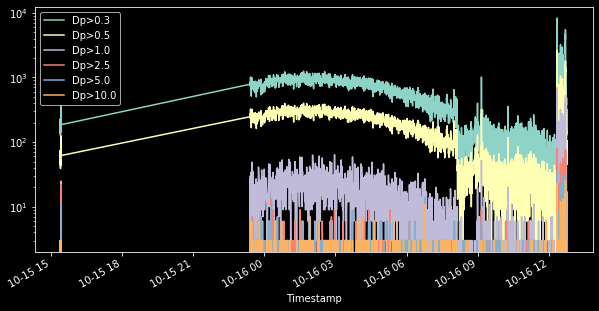

In [19]:
df_dp.plot(logy=True)

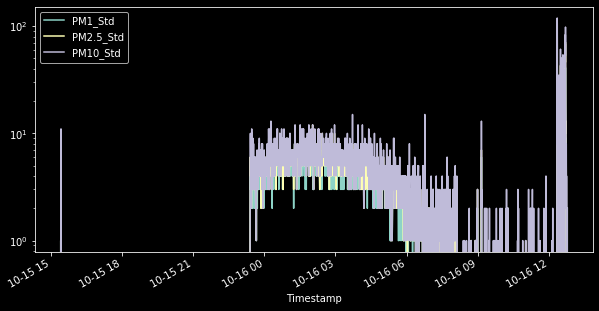

In [20]:
df_pm.plot(logy=True)

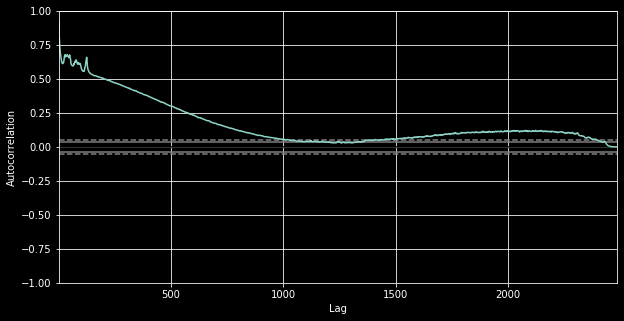

In [21]:
pd.plotting.autocorrelation_plot(df_dp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002479AFA5A08>],
      dtype=object)

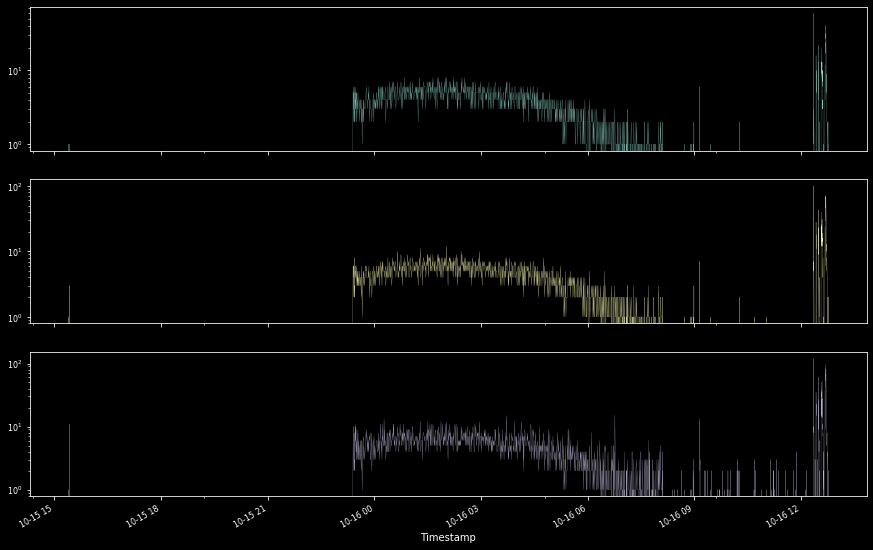

In [22]:
df_pm.plot(subplots=True,
        figsize=(15,10),
        layout=(3,1),
        sharex=True,
        sharey=False,
        fontsize=8,
        legend=False,
        linewidth=0.2,
        logy=True,
       )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002479B659348>,
      dtype=object)

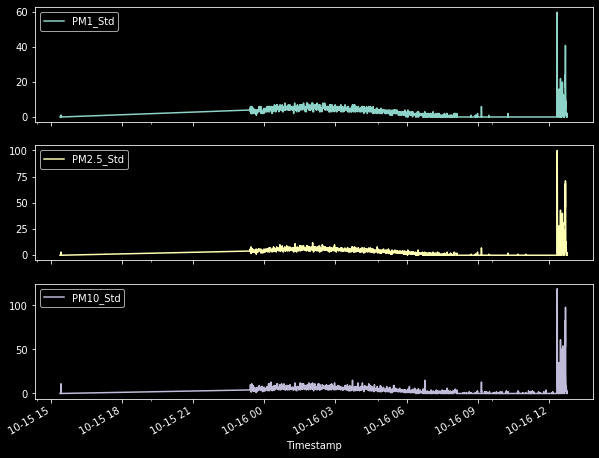

In [23]:
df_pm.plot(subplots=True, figsize=(10,8))

In [24]:
# Rolling average
points = 100
df_rolling = df_pm.rolling(points, center=True).mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002479AF900C8>,
      dtype=object)

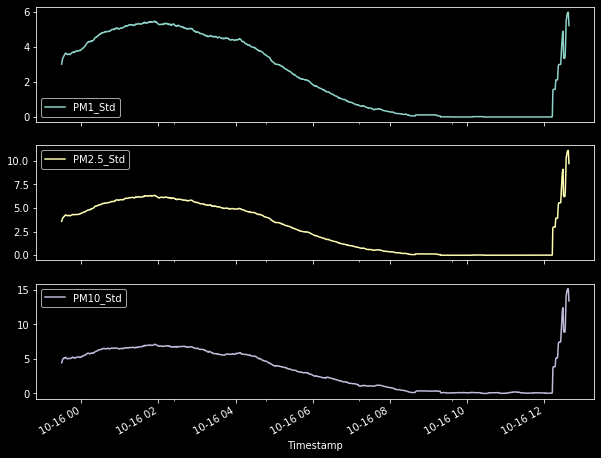

In [25]:
df_rolling.plot(subplots=True, figsize=(10,8))